In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv')


In [3]:
df=df.loc[df['Region']=='Metropolitana']


El codigo anterior deja solo los datos de la region metropolitana

In [4]:
rq = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')

In [5]:
rq=rq.rename(columns={'comuna':'Codigo_comuna'})

In [6]:
df = df.dropna()

In [7]:
df=df.rename(columns={'Comuna':'Nombre_comuna','Codigo comuna':'Codigo_comuna'})

In [8]:
merged2 = pd.merge(df,rq, on='Codigo_comuna')


In [9]:
merged2.drop(['LEI','II','EI','HDI'],axis=1, inplace=True)
merged2.head()

,Region,Codigo region,Nombre_comuna,Codigo_comuna,Poblacion,12,13,14,15,16,...,72,73,74,75,76,77,78,79,80,idh
0,Metropolitana,13,Alhue,13502.0,7405.0,42.0,31.0,30.0,27.0,68.0,...,42.0,44.0,35.0,35.0,39.0,26.0,31.0,22.0,196.0,NaN
1,Metropolitana,13,Buin,13402.0,109641.0,116.0,126.0,129.0,115.0,965.0,...,550.0,493.0,443.0,425.0,421.0,375.0,359.0,305.0,2189.0,NaN
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,46.0,41.0,53.0,54.0,300.0,...,190.0,145.0,149.0,132.0,145.0,125.0,108.0,73.0,718.0,NaN
3,Metropolitana,13,Cerrillos,13102.0,88956.0,63.0,69.0,63.0,74.0,544.0,...,478.0,500.0,512.0,385.0,430.0,391.0,380.0,394.0,2394.0,0.743
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,250.0,257.0,262.0,324.0,903.0,...,793.0,749.0,694.0,736.0,638.0,595.0,567.0,502.0,3119.0,0.683


In [10]:
merged2= merged2.fillna(0)

In [11]:
merged2['TOTAL_VAC']= merged2[['12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80']].sum(axis=1)


In [12]:
merged2.drop(['12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80'],axis=1, inplace=True)

In [13]:
merged2.head()

,Region,Codigo region,Nombre_comuna,Codigo_comuna,Poblacion,idh,TOTAL_VAC
0,Metropolitana,13,Alhue,13502.0,7405.0,0.000,5945.0
1,Metropolitana,13,Buin,13402.0,109641.0,0.000,80538.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.000,22799.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,0.743,54021.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.683,79827.0


In [14]:
merged2.drop(['Codigo region'],axis=1, inplace=True)
merged2.head()

,Region,Nombre_comuna,Codigo_comuna,Poblacion,idh,TOTAL_VAC
0,Metropolitana,Alhue,13502.0,7405.0,0.000,5945.0
1,Metropolitana,Buin,13402.0,109641.0,0.000,80538.0
2,Metropolitana,Calera de Tango,13403.0,28525.0,0.000,22799.0
3,Metropolitana,Cerrillos,13102.0,88956.0,0.743,54021.0
4,Metropolitana,Cerro Navia,13103.0,142465.0,0.683,79827.0


In [15]:
merged2['porcentaje_vacunas'] =  merged2['TOTAL_VAC'] / merged2['Poblacion']
merged2.head()

,Region,Nombre_comuna,Codigo_comuna,Poblacion,idh,TOTAL_VAC,porcentaje_vacunas
0,Metropolitana,Alhue,13502.0,7405.0,0.000,5945.0,0.802836
1,Metropolitana,Buin,13402.0,109641.0,0.000,80538.0,0.734561
2,Metropolitana,Calera de Tango,13403.0,28525.0,0.000,22799.0,0.799264
3,Metropolitana,Cerrillos,13102.0,88956.0,0.743,54021.0,0.607278
4,Metropolitana,Cerro Navia,13103.0,142465.0,0.683,79827.0,0.560327


In [16]:
merged2.corr('pearson')

,Codigo_comuna,Poblacion,idh,TOTAL_VAC,porcentaje_vacunas
Codigo_comuna,1.000000,-0.379981,-0.829147,-0.410244,0.186225
Poblacion,-0.379981,1.000000,0.433358,0.980791,-0.420600
idh,-0.829147,0.433358,1.000000,0.476853,-0.072161
TOTAL_VAC,-0.410244,0.980791,0.476853,1.000000,-0.289032
porcentaje_vacunas,0.186225,-0.420600,-0.072161,-0.289032,1.000000


In [17]:
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='idh', ylabel='porcentaje_vacunas'>

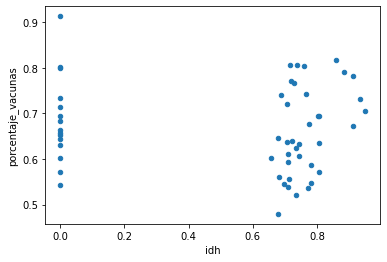

In [18]:
merged2.plot.scatter(x='idh', y='porcentaje_vacunas')

<AxesSubplot:xlabel='idh', ylabel='Nombre_comuna'>

<Figure size 7840x5600 with 0 Axes>

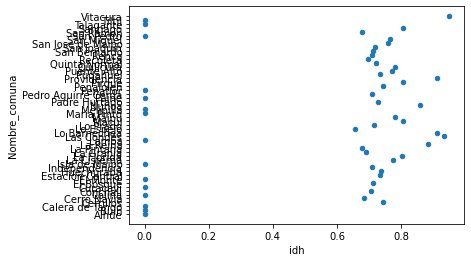

In [19]:
figure(figsize=(28, 20), dpi=280)
merged2.plot.scatter(x='idh', y='Nombre_comuna')

Text(0.5, 1.0, 'vacunacion vs idh  de la region metropolitanta')

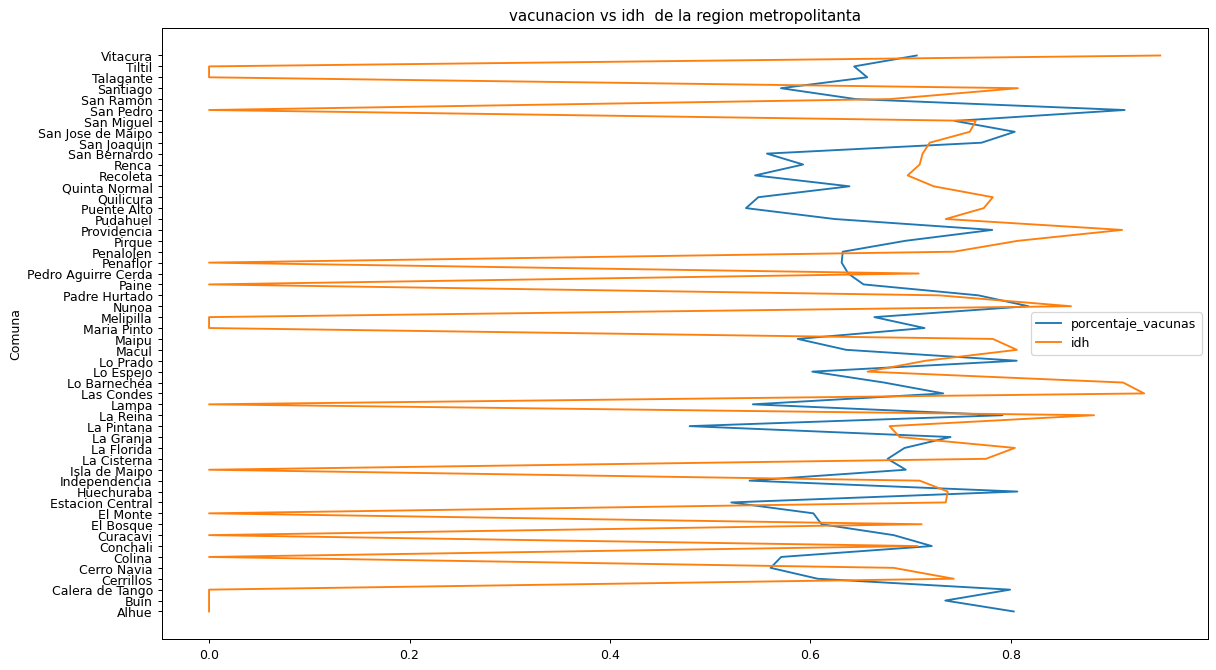

In [20]:
figure(figsize=(15, 9), dpi=90)
plt.plot(merged2['porcentaje_vacunas'],merged2['Nombre_comuna'], label = 'porcentaje_vacunas')
plt.plot(merged2['idh'],merged2['Nombre_comuna'], label= 'idh')
plt.legend(loc="right") 
plt.xlabel('')
plt.ylabel('Comuna')
plt.title('vacunacion vs idh  de la region metropolitanta')

In [21]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/NuevaDefDefunciones/DefuncionesDEIS.csv')

In [22]:
dataframe

,Publicacion,en verificación,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09
0,confirmados_2020-06-18,NaN,NaN,0.0,NaN,1.0,1,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,confirmados_2020-06-28,NaN,NaN,0.0,NaN,1.0,1,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,confirmados_2020-07-03,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,confirmados_2020-07-09,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,confirmados_2020-07-17,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,sospechosos_2021-06-11,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,sospechosos_2021-06-18,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,sospechosos_2021-06-25,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,sospechosos_2021-07-02,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
newdf = dataframe.drop(range(0,161,1))






In [24]:
newdf = newdf.drop(range(201,258,1))


In [25]:
newdf = dataframe[(dataframe['Publicacion']=='confirmados_2021-07-12')]
newdf = newdf.melt()
newdf = newdf.drop([0,1])
newdf= newdf.reset_index()
newdf = newdf.drop(['index'],axis=1)


In [26]:
newdf = newdf.query("variable >= '2020-12-24' and variable <= '2021-07-12'")


In [27]:
newdf = newdf.rename(columns ={'variable':'FECHA_DEF','value':'Cantidad muertos'})
newdf['FECHA_DEF']=pd.to_datetime(newdf['FECHA_DEF'])
newdf = newdf.resample('W', on ='FECHA_DEF').sum()
newdf = newdf.reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

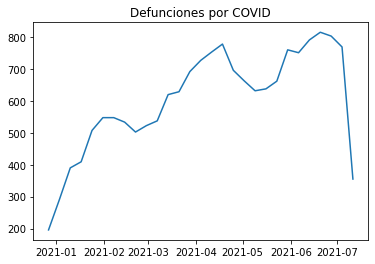

In [28]:

XX=newdf['FECHA_DEF']
YY=newdf['Cantidad muertos']

fig, ax = plt.subplots()
ax.plot(XX,YY)
plt.title("Defunciones por COVID")
plt.show

In [29]:
newdf

,FECHA_DEF,Cantidad muertos
0,2020-12-27,196.0
1,2021-01-03,291.0
2,2021-01-10,390.0
3,2021-01-17,409.0
4,2021-01-24,507.0
5,2021-01-31,547.0
6,2021-02-07,547.0
7,2021-02-14,533.0
8,2021-02-21,502.0
9,2021-02-28,522.0


In [32]:
dftres= pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto38/CasosFallecidosPorComuna.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 72, saw 3
